In [67]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,michael,29,90000
2,mohan,29,61000
3,ismail,28,60000
4,kory,42,150000


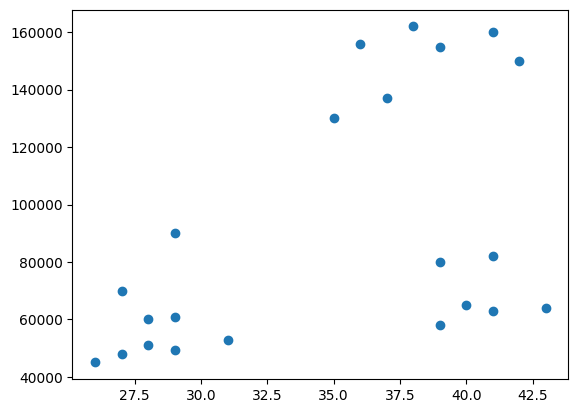

In [69]:
plt.scatter(df['Age'], df['Income'])

In [70]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [71]:
cluster = km.fit_predict(df[['Age','Income']])
cluster

c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [72]:
df['cluster'] = y_predict
df

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,michael,29,90000,0
2,mohan,29,61000,0
3,ismail,28,60000,0
4,kory,42,150000,1
5,goutam,39,155000,1
6,david,41,160000,1
7,andrew,38,162000,1
8,brad,36,156000,1
9,angelina,35,130000,1


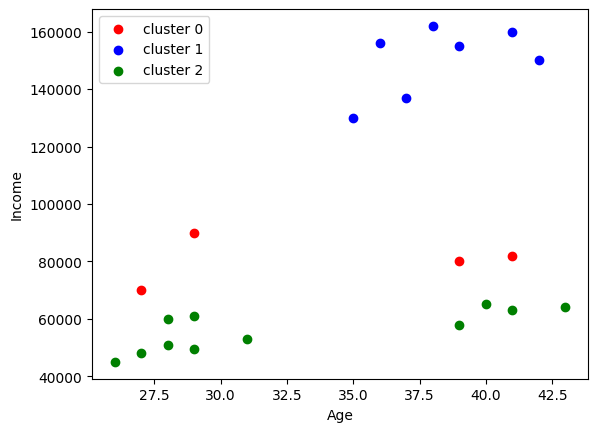

In [73]:
df0 = df[cluster==0]     # df0 = df[df['cluster']==0]
df1 = df[cluster==1]
df2 = df[cluster==2]

plt.scatter(df0.Age,df0.Income,color='red',label='cluster 0')
plt.scatter(df1.Age,df1.Income,color='blue',label='cluster 1')
plt.scatter(df2.Age,df2.Income,color='green',label='cluster 2')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [74]:
scaler = MinMaxScaler()
df['Income'] = scaler.fit_transform(df[['Income']])
df['Age'] = scaler.fit_transform(df[['Age']])
df


,Name,Age,Income,cluster
0,Rob,-1.342137,-0.480684,0
1,michael,-0.996792,-0.010159,0
2,mohan,-0.996792,-0.692421,0
3,ismail,-1.169464,-0.715947,0
4,kory,1.247952,1.401417,1
5,goutam,0.729934,1.519048,1
6,david,1.075279,1.636679,1
7,andrew,0.557261,1.683732,1
8,brad,0.211916,1.542574,1
9,angelina,0.039244,0.930891,1


In [75]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income']])
df['cluster'] = y_predict


c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [76]:
km.cluster_centers_

array([[-1.13109237, -0.74862223],
       [ 0.6065964 ,  1.40141653],
       [ 0.98894275, -0.51205261]])

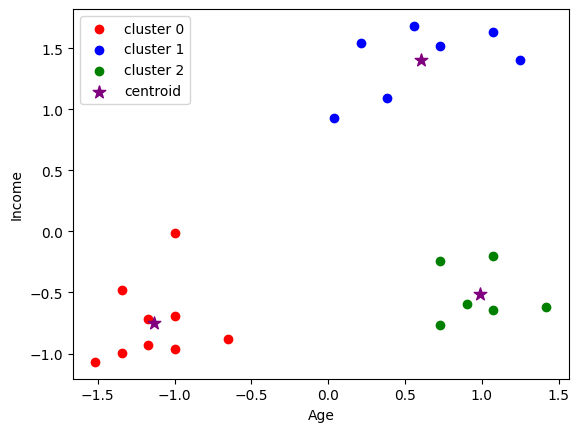

In [77]:
df0 = df[df.cluster==0]     # df0 = df[df['cluster']==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0.Age,df0.Income,color='red',label='cluster 0')
plt.scatter(df1.Age,df1.Income,color='blue',label='cluster 1')
plt.scatter(df2.Age,df2.Income,color='green',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', s=90, label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [78]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)
sse

c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\visha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

[43.99999999999999,
 15.978351749704384,
 3.6770269568880045,
 2.6238524981667406,
 1.9900673631396915,
 1.681173193416044,
 1.3115641246655532,
 1.0962928067224755,
 0.8480659195763851]

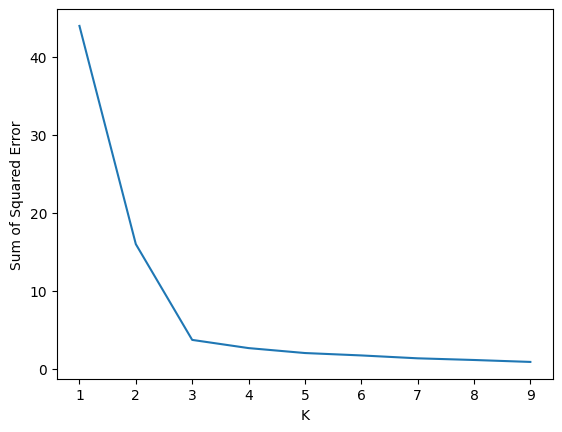

In [79]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)